In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('zillow_data.csv')

In [2]:
#here we are filtering out our zipcodes to just look at the top 500 in sizerank
df['Top500'] = df['SizeRank'].apply(lambda x: True if x <= 500 else False)

df = df.loc[df.Top500, :]

In [3]:
#creating growth rate metric and sorting to see top zips
df['GrowthRate'] = df['2018-04'] / df['1996-04'] - 1
df.sort_values('GrowthRate', ascending = False)[:10]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Top500,GrowthRate
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,True,11.189940
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,True,9.942505
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,True,9.403061
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,True,8.941958
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,771200,773300,777600,780500,781600,785500,791400,793300,True,7.622826
70,62032,11221,New York,NY,New York,Kings,71,133700.0,133700.0,133700.0,...,965300,984700,995000,998100,1000900,1015400,1037300,1048700,True,6.843680
76,97565,94110,San Francisco,CA,San Francisco,San Francisco,77,213900.0,214800.0,216000.0,...,1513500,1525200,1533600,1536500,1536200,1544400,1570000,1594000,True,6.452080
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,672200,673100,674600,678200,680900,683000,687500,691300,True,6.330859
107,96007,90026,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,108,138100.0,138300.0,138300.0,...,907700,919900,932600,947300,962600,973700,975200,972100,True,6.039102
260,62029,11218,New York,NY,New York,Kings,261,177200.0,177000.0,176800.0,...,1199700,1201800,1198000,1186400,1174500,1173900,1196100,1220900,True,5.889955


In [4]:
#checking which metros have the most top500 sizerank zipcodes
df.value_counts('Metro')[:10]

Metro
New York                          46
Los Angeles-Long Beach-Anaheim    32
Chicago                           27
Atlanta                           23
Miami-Fort Lauderdale             20
Houston                           20
Dallas-Fort Worth                 19
Washington                        14
San Francisco                     14
Charlotte                         11
dtype: int64

In [5]:
#showing that almost half of zip codes in our top 500 are represented in the top 10 metros
df.value_counts('Metro')[:10].sum()

226

In [6]:
#making dfs for our potential Metros and checking mean growthrate
#going to use NYC, Chi, LA, MIA, and DFW highest growth rates with atleast 20 zipcodes
df_nyc = df[df['Metro'] == 'New York']
df_chi = df[df['Metro'] == 'Chicago']
df_hou = df[df['Metro'] == 'Houston']
df_la = df[df['Metro'] == 'Los Angeles-Long Beach-Anaheim']
df_dfw = df[df['Metro'] == 'Dallas-Fort Worth']
df_atl = df[df['Metro'] == 'Atlanta']
df_mia = df[df['Metro'] == 'Miami-Fort Lauderdale']
df_dc = df[df['Metro'] == 'Washington']
df_sf = df[df['Metro'] == 'San Francisco']
df_cha = df[df['Metro'] == 'Charlotte']

In [7]:
df_nyc['GrowthRate'].mean()

3.7712542878046262

In [8]:
df_la['GrowthRate'].mean()

3.2231950761389916

In [9]:
df_chi['GrowthRate'].mean()

1.3872262487454181

In [10]:
df_mia['GrowthRate'].mean()

1.9554887689343101

In [11]:
df_dfw['GrowthRate'].mean()

0.9493054726931407

In [12]:
df_atl['GrowthRate'].mean()

0.8519873970692066

In [13]:
df_hou['GrowthRate'].mean()

0.6894731410422865

In [14]:
df_dc['GrowthRate'].mean()

2.9030905800676967

In [15]:
df_sf['GrowthRate'].mean()

3.3617040219529897

In [16]:
df_cha['GrowthRate'].mean()

1.0371098444006648

In [17]:
# flatiron provided function
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    
    return pd.to_datetime(df.columns.values[7:272], format='%Y-%m')

In [18]:
get_datetimes(df_nyc)
get_datetimes(df_la)
get_datetimes(df_mia)
get_datetimes(df_dfw)
get_datetimes(df_chi)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [19]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'Top500', 'GrowthRate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [20]:
df_nyc = melt_data(df_nyc)
df_la = melt_data(df_la)
df_dfw = melt_data(df_dfw)
df_mia = melt_data(df_mia)
df_chi = melt_data(df_chi)


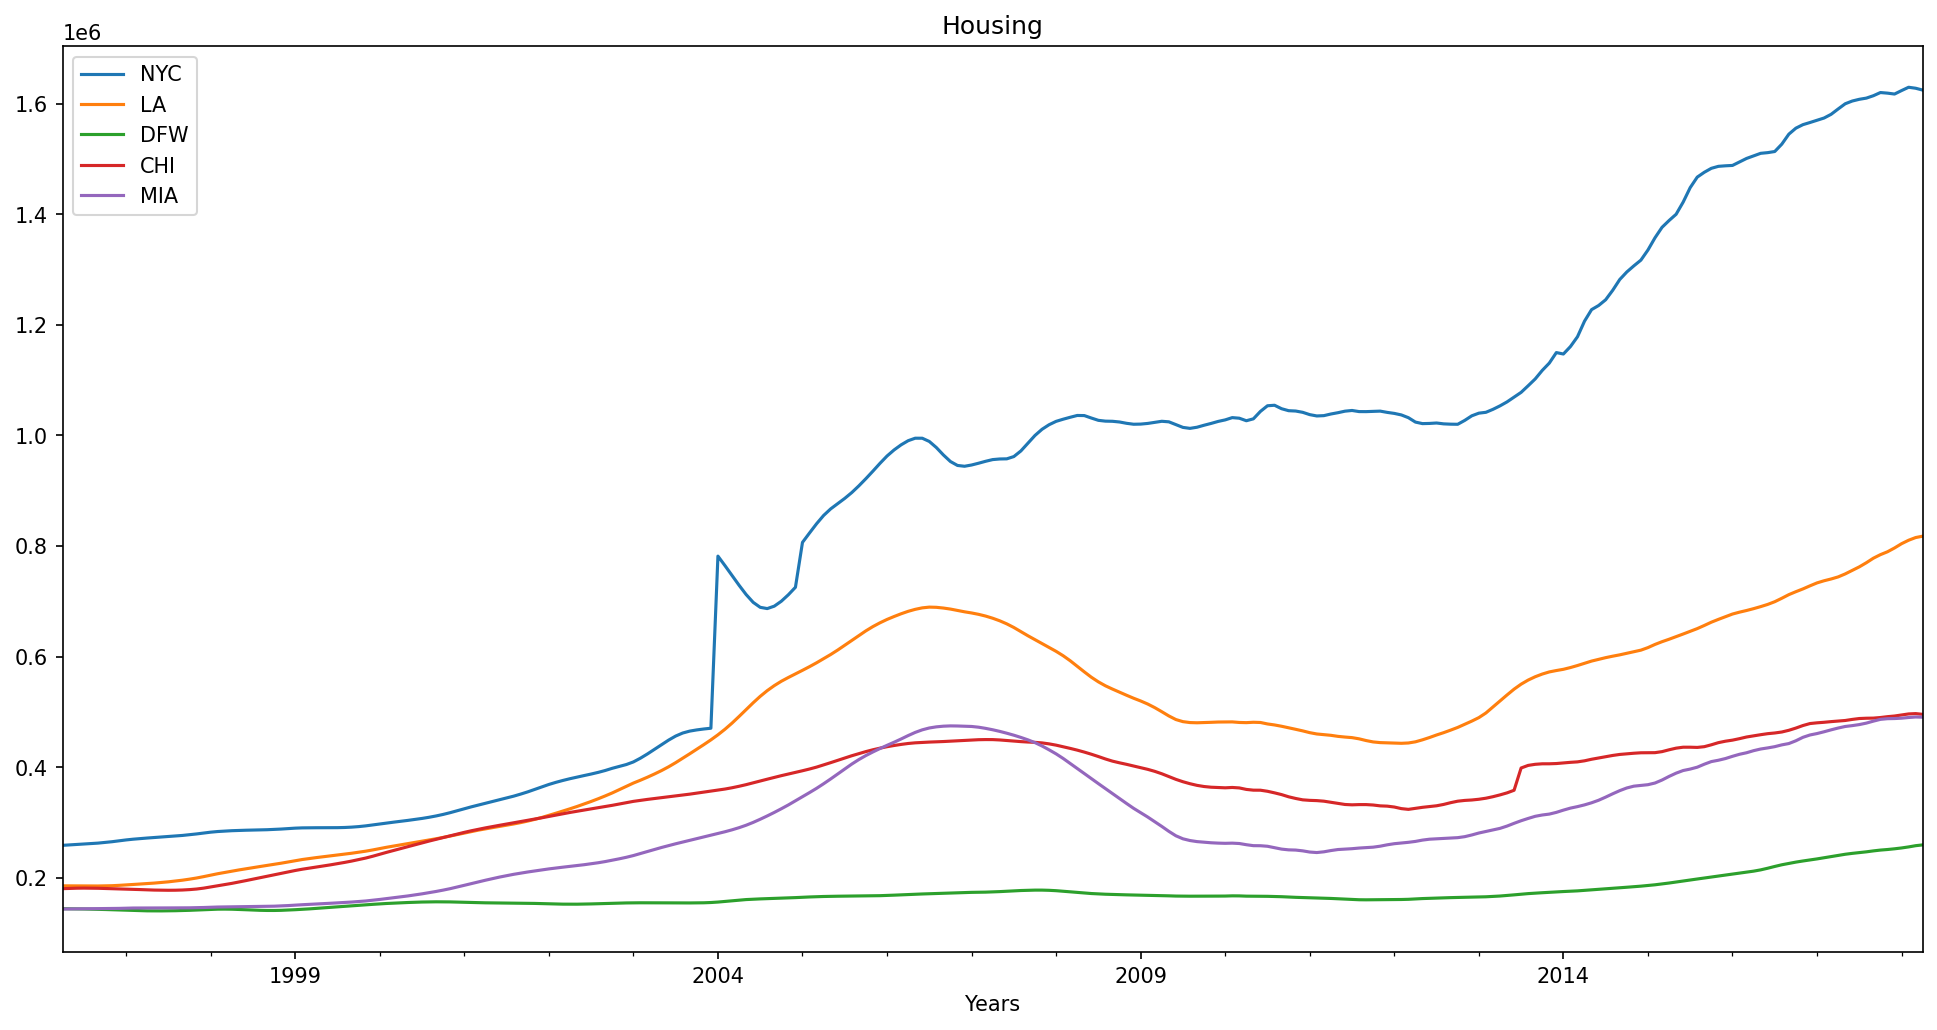

In [30]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df_nyc['value'].plot(label='NYC')
df_la['value'].plot(label='LA')
df_dfw['value'].plot(label='DFW')
df_chi['value'].plot(label='CHI')
df_mia['value'].plot(label='MIA')
# adding title to the plot
plt.title('Housing')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend();